# Biodiversity in National Parks

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset
- species_info.csv - contains data about different species and their conservation status- 
observations.csv - holds recorded sightings of different species at several national parks for the past 7 days..

In [5]:
observations_df = pd.read_csv('./observations.csv')
species_df = pd.read_csv('./species_info.csv')

## Exploratory Data Analysis

### Exploring Observations data

In [8]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [9]:
observations_df.shape

(23296, 3)

#### Concise summary

In [11]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


#### Statistical summary

In [13]:
observations_df.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


#### Data Cleaning - Check for duplicates in our Observation data

In [15]:
duplicates = observations_df.duplicated()
duplicates.value_counts()

False    23281
True        15
Name: count, dtype: int64

As we can see we have 15 duplicate observations in our dataset. Let's drop them from the dataframe using `.drop_duplicates()`.

#### Data Cleaning - Drop the duplicates

In [18]:
observations_df = observations_df.drop_duplicates()

In [19]:
duplicates = observations_df.duplicated()
duplicates.value_counts()

False    23281
Name: count, dtype: int64

We have successfully deleted all the duplicate rows from our dataset.

#### Data Cleaning - Check for missing values in our Observation data

In [22]:
observations_df.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

Looks like there are no missing values in any of our columns.

In [24]:
# How many unique values are present in the scientific_name column?
observations_df.scientific_name.nunique()

5541

In [25]:
observations_df.scientific_name.unique()[: 50]

array(['Vicia benghalensis', 'Neovison vison', 'Prunus subcordata',
       'Abutilon theophrasti', 'Githopsis specularioides',
       'Elymus virginicus var. virginicus', 'Spizella pusilla',
       'Elymus multisetus', 'Lysimachia quadrifolia',
       'Diphyscium cumberlandianum',
       'Ludwigia peploides ssp. glabrescens', 'Cistothorus platensis',
       'Setaria viridis var. viridis', 'Arabis davidsonii',
       'Fabronia ciliaris', 'Lunaria annua', 'Quercus bicolor',
       'Muhlenbergia rigens', 'Rubus idaeus ssp. strigosus',
       'Polymnia canadensis', 'Carduus nutans',
       'Ptilium crista-castrensis', 'Elodea nuttallii',
       'Larus philadelphia', 'Zizia trifoliata', 'Amaranthus retroflexus',
       'Geranium thunbergii', 'Scirpus cyperinus', 'Viola glabella',
       'Scaphiopus holbrookii holbrookii', 'Glyceria striata',
       'Veronica cusickii', 'Festuca filiformis', 'Rosa pinetorum',
       'Lysimachia nummularia', 'Sclerolinon digynum',
       'Camissonia sierrae s

In [26]:
# How many unique values are present in the park_name column?
observations_df.park_name.nunique()

4

In [27]:
# What are the unique values present in the park_name column?
observations_df.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

#### Visualizing Observations data

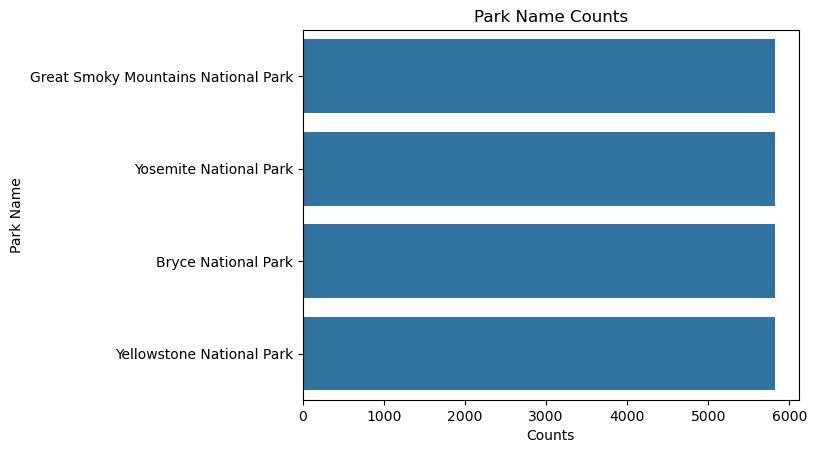

In [29]:
sns.countplot(observations_df.park_name)
plt.title('Park Name Counts')
plt.xlabel('Counts')
plt.ylabel('Park Name')
plt.show()

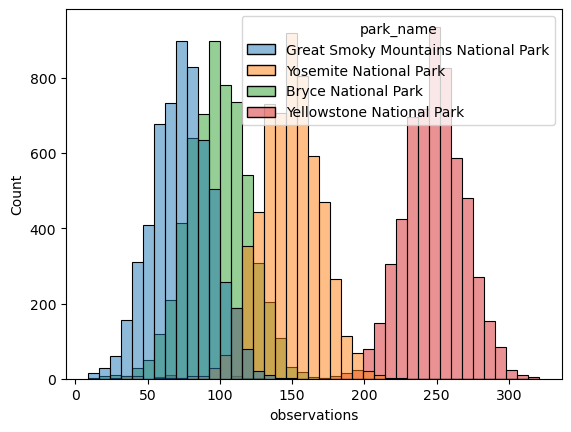

In [30]:
sns.histplot(data=observations_df, x='observations', hue='park_name')
plt.show()

### Exploring Species data

In [32]:
species_df.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [33]:
species_df.shape

(5824, 4)

#### Concise summary

In [35]:
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


#### Statistical summary

In [37]:
species_df.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


#### Data cleaning - Checking for duplicates

In [39]:
duplicates = species_df.duplicated()
duplicates.value_counts()

False    5824
Name: count, dtype: int64

#### Data cleaning - Checking for missing values

In [41]:
species_df.isna().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

Looks like there are a lot of missing values in our conservation_status.

In [43]:
species_df.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [44]:
species_df.common_names.nunique()

5504

In [45]:
species_df.common_names.unique()[:50]

array(["Gapper's Red-Backed Vole", 'American Bison, Bison',
       'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle',
       'Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)',
       'Wapiti Or Elk', 'White-Tailed Deer', 'Feral Hog, Wild Pig',
       'Coyote', 'Gray Wolf', 'Red Wolf', 'Common Gray Fox, Gray Fox',
       'Black Fox, Cross Fox, Red Fox, Silver Fox', 'Red Fox',
       'Mountain Lion', 'Wild Cat, Wildcat', 'Bobcat',
       'Panther (Mountain Lion)', 'Striped Skunk',
       'Eastern Spotted Skunk', 'River Otter', 'Northern River Otter',
       'Fisher', 'Mink (Or Weasel)', 'Long-Tailed Weasel', 'Least Weasel',
       'Mink', 'Common Raccoon, Raccoon', 'Black Bear',
       "Rafinesque's Big-Eared Bat", 'Big Brown Bat', 'Silver-Haired Bat',
       'Eastern Red Bat, Red Bat', 'Hoary Bat',
       'Mississippi Myotis, Southeastern Myotis', 'Gray Myotis',
       "Keen's Myotis",
       'Eastern Small-Footed Bat, Eastern Small-Footed Myotis',
       'Little Brown 

In [46]:
species_df.conservation_status.nunique()

4

In [47]:
species_df.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [48]:
species_df.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

#### Visualizing Species data

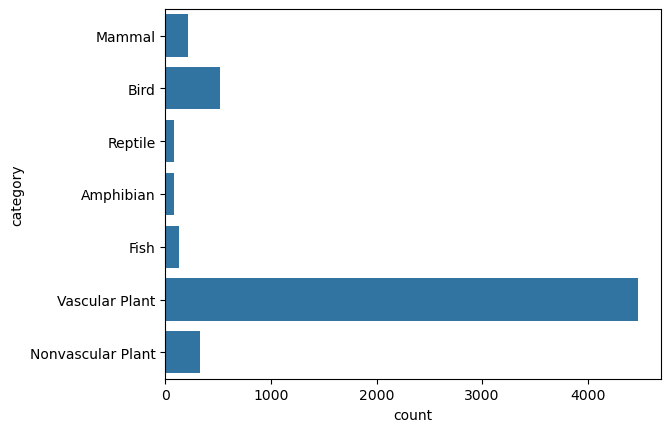

In [50]:
sns.countplot(species_df.category)
plt.show()

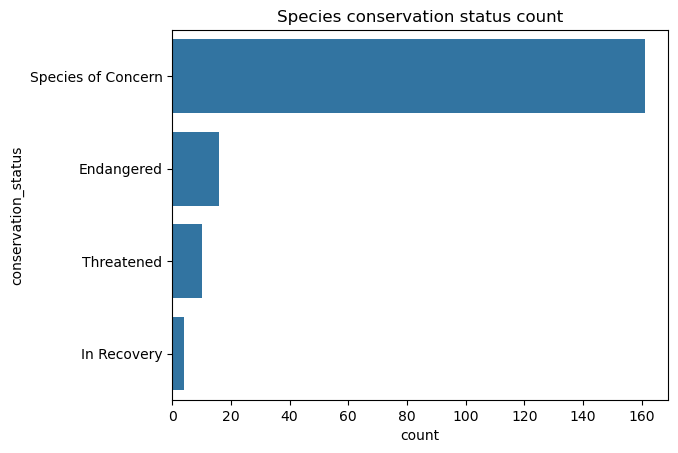

In [51]:
sns.countplot(species_df.conservation_status)
plt.title('Species conservation status count')
plt.show()

## Are certain types of species more likely to be endangered?

In [53]:
status_counts = species_df.groupby(['category', 'conservation_status'])['scientific_name'].count().reset_index()
status_counts.rename(columns={'scientific_name': 'count'}, inplace=True)
status_counts

,category,conservation_status,count
0,Amphibian,Endangered,1
1,Amphibian,Species of Concern,4
2,Amphibian,Threatened,2
3,Bird,Endangered,4
4,Bird,In Recovery,3
5,Bird,Species of Concern,72
6,Fish,Endangered,3
7,Fish,Species of Concern,4
8,Fish,Threatened,4
9,Mammal,Endangered,7


In [54]:
# Calculate the total species in each category
total_species = species_df.groupby('category')['scientific_name'].count().reset_index()
total_species.rename(columns={'scientific_name': 'total_count'}, inplace=True)

total_species

,category,total_count
0,Amphibian,80
1,Bird,521
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
5,Reptile,79
6,Vascular Plant,4470


In [55]:
# Merge the total species with the conservation status counts
merged = pd.merge(status_counts, total_species, on='category')

merged

,category,conservation_status,count,total_count
0,Amphibian,Endangered,1,80
1,Amphibian,Species of Concern,4,80
2,Amphibian,Threatened,2,80
3,Bird,Endangered,4,521
4,Bird,In Recovery,3,521
5,Bird,Species of Concern,72,521
6,Fish,Endangered,3,127
7,Fish,Species of Concern,4,127
8,Fish,Threatened,4,127
9,Mammal,Endangered,7,214


In [56]:
# Calculate the percentage of endangered species in each category
merged['percentage'] = (merged['count'] / merged['total_count']) * 100

merged

,category,conservation_status,count,total_count,percentage
0,Amphibian,Endangered,1,80,1.250000
1,Amphibian,Species of Concern,4,80,5.000000
2,Amphibian,Threatened,2,80,2.500000
3,Bird,Endangered,4,521,0.767754
4,Bird,In Recovery,3,521,0.575816
5,Bird,Species of Concern,72,521,13.819578
6,Fish,Endangered,3,127,2.362205
7,Fish,Species of Concern,4,127,3.149606
8,Fish,Threatened,4,127,3.149606
9,Mammal,Endangered,7,214,3.271028


In [57]:
# Filter to see only Endangered species
endangered = merged[merged['conservation_status'] == 'Endangered']

# Sort by percentage of endangered species
endangered_sorted = endangered.sort_values('percentage', ascending=False)

# Display the result
endangered_sorted

,category,conservation_status,count,total_count,percentage
9,Mammal,Endangered,7,214,3.271028
6,Fish,Endangered,3,127,2.362205
0,Amphibian,Endangered,1,80,1.250000
3,Bird,Endangered,4,521,0.767754
15,Vascular Plant,Endangered,1,4470,0.022371


Mammala are the most endangered types of species in our dataset, followed by Fish.

## Are the differences between species and their conservation status significant?

In [60]:
from scipy.stats import chi2_contingency

# Assuming df_species contains species data
contingency_table = pd.crosstab(species_df['category'], species_df['conservation_status'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Table:\n", expected)

# Interpretation
if p < 0.05:
    print("The differences between species and their conservation status are statistically significant.")
else:
    print("The differences are not statistically significant.")


Chi-Square Statistic: 53.91636314015659
P-value: 1.8909788349761653e-05
Degrees of Freedom: 18
Expected Table:
 [[ 0.58638743  0.14659686  5.90052356  0.36649215]
 [ 6.61780105  1.65445026 66.59162304  4.13612565]
 [ 0.92146597  0.23036649  9.27225131  0.57591623]
 [ 3.18324607  0.79581152 32.03141361  1.9895288 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 3.85340314  0.96335079 38.77486911  2.40837696]]
The differences between species and their conservation status are statistically significant.


## Which species were spotted the most at each park?

In [62]:
observations_species_df = pd.merge(observations_df, species_df)
observations_species_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


In [63]:
most_spotted_species = observations_species_df.loc[observations_species_df.groupby('park_name')['observations'].idxmax()]

In [64]:
most_spotted_species[['park_name', 'scientific_name', 'observations']]

,park_name,scientific_name,observations
14486,Bryce National Park,Valerianella radiata,176
9732,Great Smoky Mountains National Park,Sonchus asper ssp. asper,147
12438,Yellowstone National Park,Lycopodium tristachyum,321
7355,Yosemite National Park,Ivesia shockleyi var. shockleyi,223


## Conclusions

What did you learn throughout the process?
- I learned how to merge two dataframes using pandas
- Performed grouping
- Calculate p-value

What are the key findings and takeaways?
- Mammals and Fish, are more likely to be endangered compared to other categories like Birds or Vascular Plants.
-  The differences between species and their conservation status significant
-  Valerianella radiata is the most observed species in our dataset